In [1]:
import numpy as np
import maze as mz

In [2]:
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0],
])

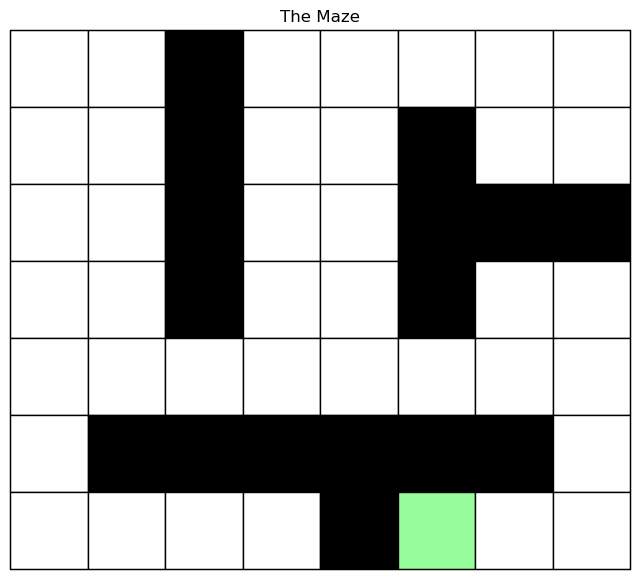

In [3]:
mz.draw_maze(maze)

In [4]:
env = mz.Maze(maze)
env.show()

[[   -1.         -1000.          -500.         -1000.
   -500.        ]
 [ -333.33333333 -1000.            -1.         -1000.
     -1.        ]
 [   -1.         -1000.          -333.33333333 -1000.
     -1.        ]
 ...
 [   -1.          -333.33333333 -1000.            -1.
  -1000.        ]
 [ -333.33333333    -1.         -1000.            -1.
  -1000.        ]
 [   -1.          -500.         -1000.          -500.
  -1000.        ]]


In [5]:
# # Finite horizon
# horizon = 20
# # Solve the MDP problem with dynamic programming 
# V, policy= mz.dynamic_programming(env,horizon);

In [6]:
# # Simulate the shortest path starting from position A
# method = 'DynProg';
# start  = (0,0,6,5);
# path, _ = env.simulate(start, policy, method);
# print(path)

In [7]:
# # Show the shortest path 
# mz.animate_solution(maze, path)

In [8]:
# Discount Factor 
gamma   = 0.95; 
# Accuracy threshold 
epsilon = 0.0001;
V, policy = mz.value_iteration(env, gamma, epsilon, poison_mode=True)

9503.282930844944
10571.561692651721
11183.890976068731
11452.993440414157
12353.730128804173
12853.833060024865
12506.113412873847
12469.752976003128
12718.060540564256
12791.669607314754
12907.586902541763
13071.228443399203
12964.75561609541
12787.268577387149
12370.715668230045
11621.49765662366
10723.478019912785
9847.72731495324
9043.496250898728
8304.944057075327
7626.70695908084
7003.859224089252
6431.877387455288
5906.607400813101
5424.234463080037
4981.255315261834
4574.452797848781
4200.872486024467
3857.8012329991343
3542.7474656375384
3253.423089277137
2987.7268703195055
2743.7291759100826
2519.6579598774265
2313.885893154102
2124.91854521318
1951.3835306874382
1792.0205423479672
1645.6721980562097
1511.275635214955
1387.8547916723971
1274.5133170191534
1170.4280627959208
1074.8431043342457
987.0642508136215
906.4540036638438
832.4269266979557
764.4453943509585
702.0156871456287
644.6844060287336
592.035179536393
543.6856398742492
499.28464595119016
458.5097331985118
421.0

In [9]:
method = 'ValIter';
start  = (0,0,6,5);
path, _ = env.simulate(start, policy, method)
print(path)

[(0, 0, 6, 5), (0, 1, 6, 6), (1, 1, 6, 5), (2, 1, 6, 6), (3, 1, 6, 7), (4, 1, 5, 7), (4, 2, 5, 6), (4, 3, 6, 6), (4, 4, 6, 5), (4, 5, 5, 5), (4, 6, 6, 5), (4, 7, 5, 5), (5, 7, 6, 5), (6, 7, 5, 5), (6, 6, 5, 6), (6, 5, 5, 5), (6, 5, 5, 4)]


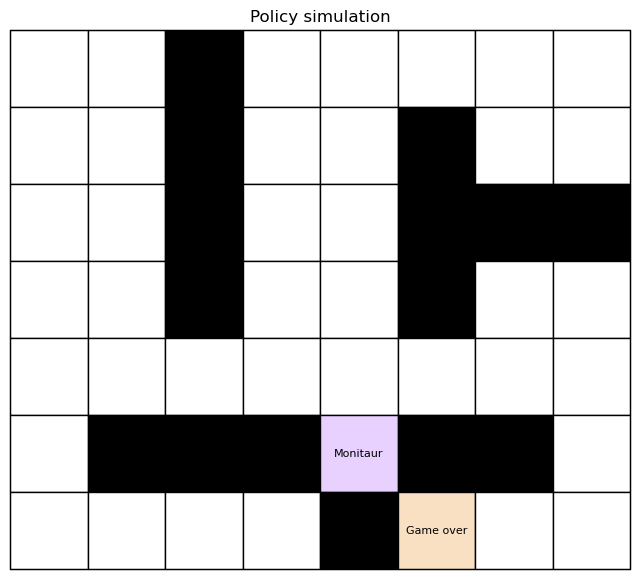

In [10]:
# Show the shortest path 
mz.animate_solution(maze, path)

Modify the rewards, giving the GOAL_REWARD == 1000 to encourage player exit quickly. The state "game over by poison" should be added to state space.
And the probability of reward and transition will change because of being poison. $$alive: \\
r'(s,a) = r(s,a) \\ p'(s'|s,a) = \frac{29}{30} p(s'|s,a) \\
dead: \\ r'(s,a) = Dead reward \\ p'(s'|s,a) = \frac{1}{30}
$$

In [13]:
N = 10000;
success_cnt = 0;
for i in range(0,N):
    path, flag = env.simulate(start, policy, method);
    print(flag)
    if flag:
        success_cnt = success_cnt + 1;
success_rate  = success_cnt/N;
print(success_rate)
        

False
False
False
True
True
True
True
True
True
False
True
False
True
False
True
False
False
True
True
False
True
True
False
False
True
True
False
False
False
False
False
False
True
False
True
True
True
False
False
True
False
False
True
False
True
False
True
True
False
False
True
False
False
False
True
False
True
False
False
True
False
False
False
False
True
False
False
True
False
True
True
False
False
False
False
True
False
False
False
False
True
True
True
True
True
False
True
False
False
False
True
False
False
False
False
False
True
False
True
True
True
True
True
False
True
True
True
True
True
True
False
False
False
True
True
True
False
False
True
False
False
False
True
True
True
True
True
True
True
True
True
True
False
True
True
True
False
True
True
True
True
False
False
True
True
True
False
False
False
False
False
True
True
True
False
False
False
False
True
True
True
False
False
True
False
True
True
False
True
False
True
False
True
False
False
False
True
True
True
False
True
False
